In [ ]:
import pandas as pd
import numpy as np
comoda = pd.read_csv('LDOS-CoMoDa.csv')
comoda=comoda.rename(columns={"userID": "user", 'itemID': 'item'})
comoda = comoda.astype('double')

In [ ]:
strin = 'age'+" NULL BINARY"
comoda[strin] = np.where(comoda['age']== -1, 1, 0)
strin = 'budget'+" NULL BINARY"
comoda[strin] = np.where(comoda['budget']== -1, 1, 0)

comoda['age'] = comoda['age'].replace(-1,0)
comoda['budget'] =comoda['budget'].replace(-1,0)
print(comoda['budget'].values.tolist())

[9000000.0, 90000000.0, 24000000.0, 60000000.0, 35000000.0, 0.0, 4000000.0, 20000000.0, 82000000.0, 8000000.0, 82000000.0, 110000000.0, 35000000.0, 35000000.0, 45000000.0, 11000000.0, 0.0, 30000000.0, 33000000.0, 90000000.0, 24000000.0, 28000000.0, 10000000.0, 160000000.0, 70000000.0, 82000000.0, 5000000.0, 0.0, 30000000.0, 15000000.0, 130000000.0, 150000000.0, 30000000.0, 8000000.0, 0.0, 0.0, 30000000.0, 22200000.0, 0.0, 0.0, 18000000.0, 30000000.0, 8000000.0, 110000000.0, 0.0, 10000000.0, 1500000.0, 110000000.0, 110000000.0, 110000000.0, 50000000.0, 25000000.0, 0.0, 130000000.0, 35000000.0, 33000000.0, 160000000.0, 20000000.0, 32000000.0, 8000000.0, 0.0, 54000000.0, 39000000.0, 18000000.0, 10000000.0, 0.0, 18000000.0, 150000000.0, 15000000.0, 40000000.0, 0.0, 0.0, 82000000.0, 80000000.0, 30000000.0, 0.0, 0.0, 13000000.0, 13000000.0, 40000000.0, 20000000.0, 28000000.0, 0.0, 100000000.0, 3300000.0, 0.0, 13000000.0, 70000000.0, 10000000.0, 7000000.0, 82500000.0, 147000000.0, 20000000.0,

In [ ]:
print(comoda)

       user    item  rating   age  sex  city  country  time  daytype  season  \
0      23.0    14.0     5.0  33.0  1.0  20.0      2.0   3.0      2.0     2.0   
1      21.0     5.0     3.0  28.0  1.0  10.0      3.0   2.0      2.0     2.0   
2      21.0     6.0     4.0  28.0  1.0  10.0      3.0   4.0      2.0     2.0   
3      22.0    13.0     4.0  28.0  1.0  20.0      2.0   3.0      2.0     3.0   
4      21.0     7.0     3.0  28.0  1.0  10.0      3.0   4.0      2.0     2.0   
...     ...     ...     ...   ...  ...   ...      ...   ...      ...     ...   
2291   31.0  4324.0     4.0  30.0  2.0  20.0      2.0   2.0      2.0     2.0   
2292   61.0   177.0     5.0  28.0  1.0  20.0      2.0   4.0      3.0     2.0   
2293  125.0   177.0     5.0  23.0  2.0   3.0      5.0   4.0      3.0     2.0   
2294   21.0  4288.0     2.0  28.0  1.0  10.0      3.0   2.0      2.0     2.0   
2295  245.0  3870.0     5.0  32.0  1.0   3.0      3.0  -1.0     -1.0    -1.0   

      ...  movieYear  genre1  genre2  g

In [ ]:
normDF = comoda[['age','movieYear','budget']]
normalized_df=(normDF-normDF.mean())/normDF.std()
print(normalized_df)
comoda=comoda.drop(columns=['age','movieYear','budget'])
print(comoda)
comoda=comoda.join(normalized_df)

           age  movieYear    budget
0     0.341087   0.277273 -0.692461
1     0.103600  -0.601496  0.800056
2     0.103600   0.374914 -0.416069
3     0.103600   0.570197  0.247271
4     0.103600  -0.113291 -0.213382
...        ...        ...       ...
2291  0.198595   0.667838  1.444970
2292  0.103600  -2.456677 -0.858297
2293 -0.133886  -2.456677 -0.858297
2294  0.103600   0.765479  0.578942
2295  0.293590  -0.601496 -0.489774

[2296 rows x 3 columns]
       user    item  rating  sex  city  country  time  daytype  season  \
0      23.0    14.0     5.0  1.0  20.0      2.0   3.0      2.0     2.0   
1      21.0     5.0     3.0  1.0  10.0      3.0   2.0      2.0     2.0   
2      21.0     6.0     4.0  1.0  10.0      3.0   4.0      2.0     2.0   
3      22.0    13.0     4.0  1.0  20.0      2.0   3.0      2.0     3.0   
4      21.0     7.0     3.0  1.0  10.0      3.0   4.0      2.0     2.0   
...     ...     ...     ...  ...   ...      ...   ...      ...     ...   
2291   31.0  4324.0     4

In [ ]:
print(comoda.columns)
print(len(comoda.columns))
userContext = [ 'sex','country','age NULL BINARY','age']
itemContext = ['director', 'movieCountry', 'movieLanguage', 'genre1', 'genre2', 'genre3', 'actor1', 'actor2', 'actor3','budget NULL BINARY', 'movieYear','budget']
interactionContext = ['city','time', 'daytype','season', 'location', 'weather', 'social', 'endEmo', 'dominantEmo','mood', 'physical', 'decision', 'interaction']

numericalData = ['age','movieYear','budget']

Index(['user', 'item', 'rating', 'sex', 'city', 'country', 'time', 'daytype',
       'season', 'location', 'weather', 'social', 'endEmo', 'dominantEmo',
       'mood', 'physical', 'decision', 'interaction', 'director',
       'movieCountry', 'movieLanguage', 'genre1', 'genre2', 'genre3', 'actor1',
       'actor2', 'actor3', 'age NULL BINARY', 'budget NULL BINARY', 'age',
       'movieYear', 'budget'],
      dtype='object')
32


In [ ]:
print(len(userContext))
print(set(comoda.columns.values.tolist())-set(userContext))

4
{'daytype', 'season', 'social', 'actor1', 'mood', 'budget NULL BINARY', 'user', 'endEmo', 'city', 'time', 'genre3', 'physical', 'movieLanguage', 'movieYear', 'rating', 'item', 'decision', 'genre2', 'budget', 'weather', 'movieCountry', 'actor2', 'actor3', 'director', 'genre1', 'dominantEmo', 'location', 'interaction'}


In [ ]:
comodas = comoda.values.tolist()
columns = comoda.columns.tolist()
print(comodas)
print(columns)
listOfDict = []

for row in comodas:
  testdict = {}
  id=0
  y=-1
  
  for item in row:
    if columns[id] == 'user' or columns[id]== 'item':
      testdict[columns[id]]=str(int(item))
    if columns[id]== 'rating':
        y=item
    #if (userContext.count(columns[id])>0 or itemContext.count(columns[id])>0 or interactionContext.count(columns[id])>0):
    if itemContext.count(columns[id])>0:
      if numericalData.count(columns[id])==0:
        testdict[columns[id]]=str(int(item))
      else:
        testdict[columns[id]]=item
    id+=1
    
 
  listOfDict.append([testdict,y])
print(listOfDict)

[[23.0, 14.0, 5.0, 1.0, 20.0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 234.0, 36.0, 9.0, 7.0, -1.0, -1.0, 1303.0, 1524.0, 1656.0, 0.0, 0.0, 0.34108680455648177, 0.27727342539155336, -0.6924613933840779], [21.0, 5.0, 3.0, 1.0, 10.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 775.0, 37.0, 9.0, 7.0, 6.0, 10.0, 1636.0, 1539.0, 1402.0, 0.0, 0.0, 0.10360035888032881, -0.6014962160641054, 0.8000555123340957], [21.0, 6.0, 4.0, 1.0, 10.0, 3.0, 4.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 33.0, 37.0, 9.0, 7.0, 10.0, 18.0, 1373.0, 1510.0, 1691.0, 0.0, 0.0, 0.10360035888032881, 0.37491449666440435, -0.4160693738066383], [22.0, 13.0, 4.0, 1.0, 20.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 590.0, 37.0, 9.0, 1.0, 14.0, 19.0, 1382.0, 57.0, 1109.0, 0.0, 0.0, 0.10360035888032881, 0.5701966392101063, 0.24727147317921663], [21.0, 7.0, 3.0, 1.0, 10.0, 3.0, 4.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 7.0, 1.0, 1.0, 2.0, 1.0, 488.0,

In [ ]:
print(len(listOfDict))

2296


In [ ]:
import random
import math
random.shuffle(listOfDict)
trainCutOff = math.floor(0.8*len(listOfDict))
X = []
y = []
for item in listOfDict:
  X.append(item[0])
  y.append(item[1])
train = X[:trainCutOff]
test = X[trainCutOff:]
y_train = y[:trainCutOff]
y_test = y[trainCutOff:]


In [ ]:
print(len(X[0]))
print(X)

14
[{'user': '243', 'item': '4092', 'director': '355', 'movieCountry': '37', 'movieLanguage': '9', 'genre1': '1', 'genre2': '3', 'genre3': '19', 'actor1': '335', 'actor2': '1877', 'actor3': '749', 'budget NULL BINARY': '0', 'movieYear': 0.6678377104829573, 'budget': 1.7213622442588943}, {'user': '33', 'item': '155', 'director': '278', 'movieCountry': '37', 'movieLanguage': '9', 'genre1': '3', 'genre2': '7', 'genre3': '10', 'actor1': '817', 'actor2': '1745', 'actor3': '448', 'budget NULL BINARY': '0', 'movieYear': 0.27727342539155336, 'budget': -0.7477397972995657}, {'user': '157', 'item': '3649', 'director': '769', 'movieCountry': '37', 'movieLanguage': '9', 'genre1': '7', 'genre2': '8', 'genre3': '-1', 'actor1': '224', 'actor2': '522', 'actor3': '1986', 'budget NULL BINARY': '0', 'movieYear': 0.4725555679372553, 'budget': -0.21338189278318262}, {'user': '31', 'item': '3949', 'director': '583', 'movieCountry': '37', 'movieLanguage': '9', 'genre1': '1', 'genre2': '17', 'genre3': '21', '

In [ ]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer()
X_train = v.fit_transform(train)
X_test = v.transform(test)


In [ ]:
print(X_train.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
from pyfm import pylibfm
fm = pylibfm.FM(num_iter=5, verbose=True, task="regression", initial_learning_rate=0.001, learning_rate_schedule="optimal")

In [ ]:
fm.fit(X_train,y_train)

Creating validation dataset of 0.01 of training for adaptive regularization
-- Epoch 1
Training MSE: 0.93567
-- Epoch 2
Training MSE: 0.54235
-- Epoch 3
Training MSE: 0.47440
-- Epoch 4
Training MSE: 0.42892
-- Epoch 5
Training MSE: 0.39791


In [ ]:
preds = fm.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error
print( mean_squared_error(y_test,preds,squared=False))
print( mean_absolute_error(y_test,preds))

1.0285214883792366
0.8318601258212884


In [ ]:
print(preds)
print(y_test)

[4.68400189 3.23794105 2.83776155 2.66329605 4.93064527 3.17681455
 3.79333104 3.15956617 4.02963987 2.89692907 3.78256898 2.27047228
 3.09562414 4.9073594  3.36539172 5.         4.47236045 4.70259168
 2.67286642 4.41130729 3.34726559 2.35606291 2.05922236 3.41025185
 5.         3.70411099 4.27487323 3.82572721 4.82570473 5.
 5.         3.91223175 2.5521481  4.02667784 4.10421749 3.82426993
 4.01464776 5.         3.5578566  3.15637505 4.1527719  4.0076348
 2.23345179 4.31656511 3.50386941 3.59369894 2.77750642 2.0855733
 4.17424448 3.20792233 2.59315662 3.69121141 5.         4.31086879
 3.02664949 3.54114203 2.50458402 4.52356701 2.73203493 5.
 3.89497899 3.34975201 5.         4.00278183 3.78778701 3.99430232
 2.89691483 3.17235675 3.39782641 3.02155268 3.53309757 4.11811705
 3.7359054  4.03503144 4.83830305 3.69015175 3.1926069  4.20217978
 2.98751516 4.90177459 4.63449757 4.2652313  3.12744218 5.
 4.02889654 2.78009454 4.45043887 3.41062464 4.11761165 2.47382866
 3.42013342 4.8028551

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc209c14e50>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc209c18910>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc209c14890>,
 'medians': [<matplotlib.lines.Line2D at 0x7fc209c1f410>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fc209c1f950>,
 'means': []}

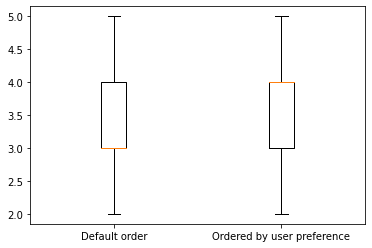

In [ ]:
from matplotlib.pyplot import boxplot
default = [3,4,5,4,4,2,3,5,4,3,2,3,2]
userPreferance = [5,3,4,3,3,5,4,3,2,3,4,5,4]
boxplot([default, userPreferance],labels=["Default order","Ordered by user preference"],sym ="blue", showfliers = True )